In [35]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
!pip install utils
import utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!pip install -r /content/drive/MyDrive/detection/yolov5-master/yolov5/requirements.txt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
pip install -U ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New Section

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


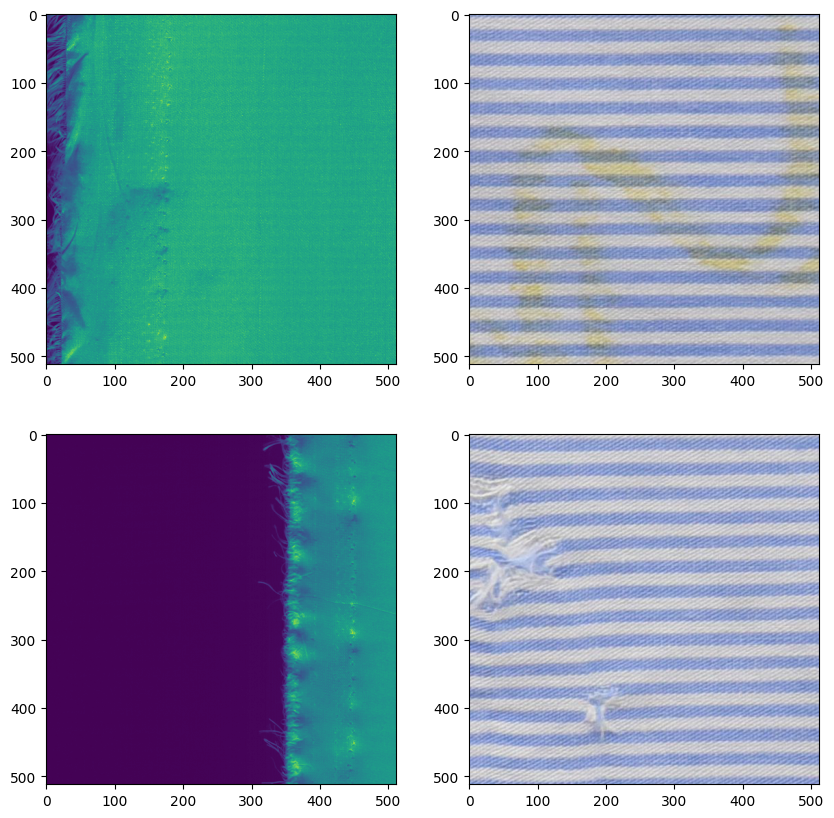

In [37]:
img1 = Image.open('/content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/train/images/086869.jpg')
img2 = Image.open('/content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/train/images/010782.jpg')
img3 = Image.open('/content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/train/images/086852.jpg')
img4 = Image.open('/content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/train/images/010774.jpg')
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img1)
plt.subplot(2,2,2)
plt.imshow(img2)
plt.subplot(2,2,3)
plt.imshow(img3)
plt.subplot(2,2,4)
plt.imshow(img4)

plt.show()


In [38]:

_, _, files1 = next(os.walk("/content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/train/images"))

print("Number of Samples in Train Data: ",len(files1))

_, _, files2 = next(os.walk("/content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/valid/images"))

print("Number of Samples in Validation Data: ",len(files2))



Number of Samples in Train Data:  116
Number of Samples in Validation Data:  49




>**Model training** 



In [39]:
print("Train : Valid ::",len(files1)/(len(files1)+len(files2)),":",len(files2)/(len(files1)+len(files2)))
TRAIN = True
EPOCHS = 1000

Train : Valid :: 0.703030303030303 : 0.296969696969697


In [ ]:

!python /content/drive/MyDrive/detection/yolov5-master/yolov5/train.py --img 640 --batch 16 --epochs {EPOCHS} --data /content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/data.yaml --weights yolov5m.pt


train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/data.yaml, hyp=drive/MyDrive/detection/yolov5-master/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=3000, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=drive/MyDrive/detection/yolov5-master/yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2023-6-1 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup

Model test

In [ ]:
%pwd 


'/content'

In [ ]:
#run model command 
!python /content/drive/MyDrive/detection/yolov5-master/yolov5/detect.py --weights /content/drive/MyDrive/detection/yolov5-master/yolov5/runs/train/exp2/weights/best.pt --img 640 --data ../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/data.yaml --source ../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/valid/images/010815.jpg


detect: weights=['/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/train/exp2/weights/best.pt'], source=../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/valid/images/010815.jpg, data=../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/detection/yolov5-master/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-6-1 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/valid/images/010815.jpg: 640x640 1 defect, 27.0ms
Speed: 0

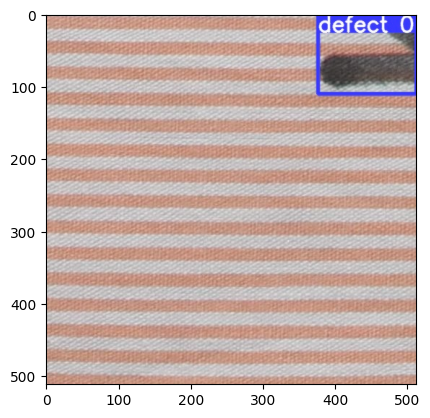

In [51]:
# output defect image 
%matplotlib inline
img = cv2.imread("/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/detect/exp9/010815.jpg")
plt.imshow(img),
plt.show()


using functions to run model insted of command

In [62]:
# option 2
# 2 files are getting generated in runs/detect/exp-- but only 1 should  
import subprocess
import os
import re

def get_highest_exp_number(folder_path):
    # Get a list of directories in the specified folder
    dirs = [d for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]

    # Find the highest exp number from the directories
    exp_numbers = []
    for dir_name in dirs:
        match = re.search(r'exp(\d+)', dir_name)
        if match:
            exp_number = int(match.group(1))
            exp_numbers.append(exp_number)

    # Get the highest exp number
    highest_exp_number = max(exp_numbers) if exp_numbers else 0

    return highest_exp_number

def get_output_file_path(source_path, folder_path):
    # Get the highest exp number
    highest_exp_number = get_highest_exp_number(folder_path)

    # Increment the highest exp number to generate the next experiment number
    exp_number = highest_exp_number + 1

    # Get the name of the input image file (without extension)
    file_name = os.path.splitext(os.path.basename(source_path))[0]

    # Generate the output file path
    output_folder = os.path.join(folder_path, 'exp{}'.format(exp_number))
    output_labels_folder = os.path.join(output_folder, 'labels')
    os.makedirs(output_labels_folder, exist_ok=True)
    output_file_path = os.path.join(output_labels_folder, file_name + '.txt')

    return output_file_path

def run_yolov5_model(source_path, folder_path):
    weights_path = '/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/train/exp2/weights/best.pt'
    data_path = '../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/data.yaml'

    command = [
        'python',
        '/content/drive/MyDrive/detection/yolov5-master/yolov5/detect.py',
        '--weights', weights_path,
        '--img', '640',
        '--data', data_path,
        '--source', source_path,
        '--save-txt'
    ]

    subprocess.run(command)

    output_file_path = get_output_file_path(source_path, folder_path)
    return output_file_path

source_path = '../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/valid/images/010834.jpg'
folder_path = '/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/detect/'

output_file_path = run_yolov5_model(source_path, folder_path)
print(output_file_path)


/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/detect/exp55/labels/010834.txt


In [ ]:
# option 3 - run model command with txt file flag on
!python /content/drive/MyDrive/detection/yolov5-master/yolov5/detect.py --weights /content/drive/MyDrive/detection/yolov5-master/yolov5/runs/train/exp2/weights/best.pt --img 640 --data ../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/data.yaml --source ../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/valid/images/010830.jpg --save-txt


detect: weights=['/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/train/exp2/weights/best.pt'], source=../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/valid/images/010830.jpg, data=../content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/detection/yolov5-master/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-6-1 Python-3.10.11 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients
bounding box is  0 7 216 243
image 1/1 /content/drive/MyDrive/detection/yolov5-master/yolov5/dataset/valid/images/010830.jpg: 640x640 1 defect, 991.4ms
Speed: 10.7ms pr

getting file contents and bounding boxes

In [ ]:
def print_file_contents(file_path):
    with open(file_path, 'r') as file:
        contents = file.read()
        print(contents)

file_path = '/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/detect/exp13/labels/010830.txt'
print_file_contents(file_path)

0 0.210938 0.244141 0.421875 0.460938



In [ ]:
def extract_bounding_box(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()
        parameters = last_line.split()
        bounding_box = [float(param) for param in parameters[1:]]
        return bounding_box

# [x_min, y_min, x_max, y_max] last 4 parameters

bounding_box = extract_bounding_box(file_path)
print(bounding_box) 

[0.210938, 0.244141, 0.421875, 0.460938]


requirement for frontend -> bounding box array

In [ ]:
identify_model = "Trained"
defect_model = "Trained"

In [ ]:
#try ... under maintenance
def identify_and_detect(img):
    fabric_type = identify_model.predict(img)
    pos = defect_model.predict(img)
    return fabric_type, pos

In [ ]:
print_file_contents('/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/detect/exp43/labels/010834.txt')


0 0.882812 0.761719 0.234375 0.46875



In [ ]:
print( extract_bounding_box("/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/detect/exp43/labels/010834.txt") )


[0.882812, 0.761719, 0.234375, 0.46875]


In [ ]:
# %pip install comet_ml --quiet

In [33]:
import os 
RANK = int(os.getenv("RANK", 1))

In [34]:
RANK

1

In [64]:
!cp -r /content/drive/MyDrive/detection/yolov5-master/yolov5/runs /content/drive/MyDrive/detection/yolov5_runs


In [63]:
results = pd.read_csv('/content/drive/MyDrive/detection/yolov5-master/yolov5/runs/train/exp2/results.csv')

results.columns = results.columns.str.strip()

results.columns

Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       'x/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')